<a href="https://colab.research.google.com/github/delisopia/tugas_uas_ekal-ilis-liana/blob/main/uas_eka_lilis_liana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [2]:
data_content = """DER,ROA,Sales Growth,ROE,NPM,Category
1.32,0.06,0.33,0.13,0.12,1
1.14,-0.05,0.41,-0.12,-0.13,1
0.49,0.05,0.03,0.07,0.13,1
3.97,-0.02,0.22,-0.08,-0.16,1
0.51,0.21,0.17,0.32,0.25,4
0.88,0.03,0.3,0.06,0.07,1
0.31,0.11,0.79,0.14,0.17,4
2.28,-0.05,-0.17,-0.16,-0.54,1
1.38,0.12,0.68,0.29,0.21,4
0.67,0.01,0.67,0.01,0.01,1
0.72,0.08,0.28,0.13,0.13,1
-2.86,-0.32,-0.22,0,-1.99,3
1.58,-0.04,0.16,-0.1,-0.05,1
0.16,0.02,-0.17,0.02,0.05,1
0.38,0,0.36,-0.01,-0.01,1
0.18,-0.01,0.41,-0.02,-0.03,1
2.79,0.06,1.44,0.24,0.07,2
8.53,-0.02,0.99,-0.21,-0.01,2
3.15,-0.02,0,-0.08,-0.5,1
16.33,-0.05,0,-0.93,-0.18,0
0.67,0.31,1.42,0.52,0.4,4
0.91,0.08,0.16,0.15,0.15,1
0.08,0.04,0.16,0.05,0.04,1
4.09,0.02,0.29,0.1,0.01,1
1.68,0.01,-0.28,0.01,0.03,1
0.54,0.06,0.17,0.08,0.11,1
0.65,0.02,0.14,0.04,0.06,1
0.59,0.09,0.24,0.15,0.18,1
1.91,-0.06,-0.15,-0.18,-0.14,1"""

In [4]:
df = pd.read_csv(StringIO(data_content))

print("--- Dataset Financial Data Ratio Aneka Industri 2021 ---")
print(df.head())
print("-" * 50)

--- Dataset Financial Data Ratio Aneka Industri 2021 ---
    DER   ROA  Sales Growth   ROE   NPM  Category
0  1.32  0.06          0.33  0.13  0.12         1
1  1.14 -0.05          0.41 -0.12 -0.13         1
2  0.49  0.05          0.03  0.07  0.13         1
3  3.97 -0.02          0.22 -0.08 -0.16         1
4  0.51  0.21          0.17  0.32  0.25         4
--------------------------------------------------


In [5]:
X = df[['DER', 'ROA', 'Sales Growth', 'ROE', 'NPM']]
y = df['Category']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.7785
R-squared (R2): 0.3631


In [11]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n--- Koefisien Regresi ---")
print(coeff_df)


--- Koefisien Regresi ---
              Coefficient
DER             -0.061978
ROA             10.965305
Sales Growth     1.125279
ROE             -0.240008
NPM             -2.678320


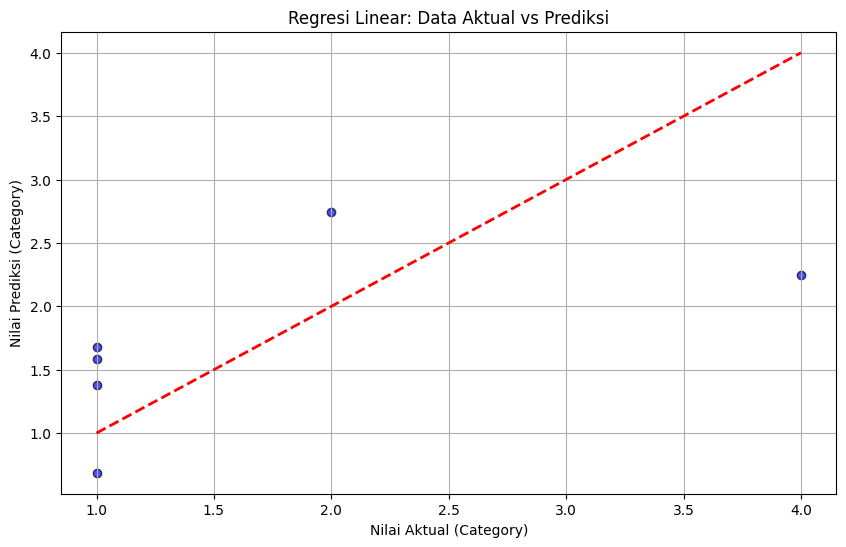

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual (Category)')
plt.ylabel('Nilai Prediksi (Category)')
plt.title('Regresi Linear: Data Aktual vs Prediksi')
plt.grid(True)
plt.show()